# The Finite Difference Method on Schrödinger Equation of two particles in a 1-D potential

In [174]:
# imports
import sys
import numpy as np
import scipy.linalg as la
from matplotlib import pyplot as plot

In [175]:
# constants
MAX_INT = sys.maxsize
hbar = 1
mass = 1
charge = 1

In [176]:
# simulation parameters
step_size = 0.08
number_of_data_points = 50 - 1

In [177]:
# construct kinetic operator
kinetic = np.zeros((np.square(number_of_data_points), np.square(number_of_data_points)))

for i in range(np.square(number_of_data_points)):
    kinetic[i,i] = 4
    if i >= number_of_data_points:
        kinetic[i,i-number_of_data_points] = -1
    if i < np.square(number_of_data_points)-number_of_data_points:
        kinetic[i,i+number_of_data_points] = -1
      
    if i % number_of_data_points == number_of_data_points-1:
        kinetic[i,i-1] = -1
    elif i % number_of_data_points == 0:
        kinetic[i,i+1] = -1
    else:
        kinetic[i,i-1] = -1
        kinetic[i,i+1] = -1
        
kinetic_multiplier = np.square(hbar) / (2 * mass * np.square(step_size))
kinetic = kinetic * kinetic_multiplier

In [178]:
# construct potential operator
potential_one_dimension = np.zeros(number_of_data_points)
length = step_size * (number_of_data_points + 1)
x_positions = np.linspace(0, length, number_of_data_points)

# Harmonic Potential
a = 60

if True:
    for i in range(len(x_positions)):
        potential_one_dimension[i] = a * np.square(x_positions[i] - length / 2)

# Double Well Potential
a = 80
c = 0.4

if False:
    for i in range(len(x_positions)):
        potential_one_dimension[i] = 50 + a * (c * np.power(x_positions[i] - length / 2, 4) - np.power(x_positions[i] - length / 2, 2))


potential = np.zeros((np.square(number_of_data_points), np.square(number_of_data_points)))

# get potential matrix from
if True:
    for j in range(number_of_data_points):
        for i in range(number_of_data_points):
            potential[j * number_of_data_points + i, j * number_of_data_points + i] = potential_one_dimension[i] + potential_one_dimension[j]

In [179]:
# solve eigenvalue problem and save calculated data
hamiltonian = kinetic + potential

display_values = []
display_vectors = []

eigenvalues, eigenvectors = la.eig(hamiltonian)
eigenvalues = np.real(eigenvalues)

for i in range(41):
    index = np.argmin(eigenvalues)
    display_values.append(eigenvalues[index])
    display_vectors.append(eigenvectors[:,index].reshape((number_of_data_points, number_of_data_points)))
    
    sum = 0
    for k in range(number_of_data_points):
        for j in range(number_of_data_points):
            sum += display_vectors[i][k, j] * display_vectors[i][k, j] * step_size
            
    for k in range(number_of_data_points):
        for j in range(number_of_data_points):
            display_vectors[i][k, j] = display_vectors[i][k, j] / sum
    
    eigenvalues[index] = MAX_INT

In [180]:
# print energy values of eigen states
for i in range(40):
    if i == 0:
        print('Ground State: ' + str(display_values[i]))
    else:
        print(str(i) + '. Excited State: ' + str(display_values[i]))

Ground State: 11.358562231994531
1. Excited State: 22.66430770202942
2. Excited State: 22.66430770203219
3. Excited State: 33.86365427696597
4. Excited State: 33.863654276966095
5. Excited State: 33.97005317207339
6. Excited State: 44.955033125339995
7. Excited State: 44.9550331253409
8. Excited State: 45.16939974700662
9. Excited State: 45.169399747009486
10. Excited State: 55.936796007876815
11. Excited State: 55.93679600787872
12. Excited State: 56.26077859538301
13. Excited State: 56.26077859538353
14. Excited State: 56.3687463219424
15. Excited State: 66.80720842487206
16. Excited State: 66.80720842487322
17. Excited State: 67.24254147791486
18. Excited State: 67.24254147791908
19. Excited State: 67.4601251703139
20. Excited State: 67.46012517031724
21. Excited State: 77.56444191457331
22. Excited State: 77.56444191457591
23. Excited State: 78.11295389491201
24. Excited State: 78.1129538949122
25. Excited State: 78.44188805285012
26. Excited State: 78.44188805285137
27. Excited St

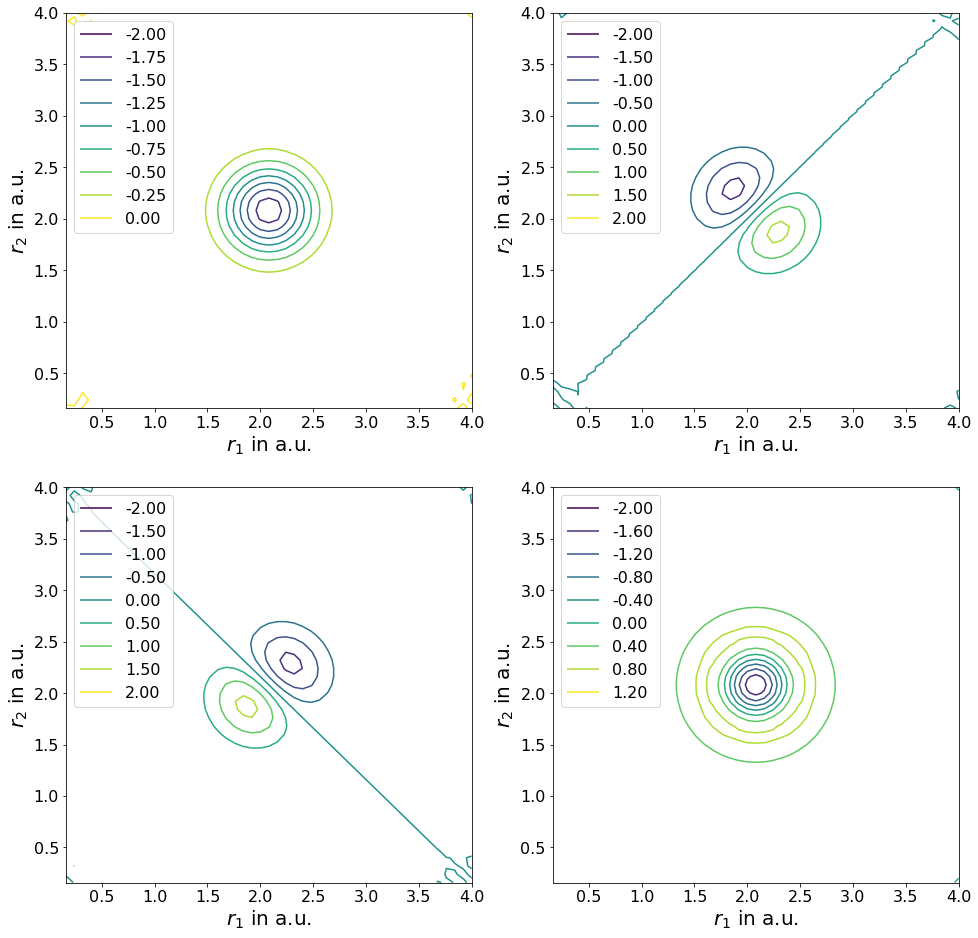

In [181]:
# plot eigenvalues as contours
fig, _ax = plot.subplots(nrows=2, ncols=2)
ax = _ax.flatten()

# set size of plot
fig.set_size_inches(16, 16)

x = y = np.arange(0, step_size * number_of_data_points, step_size)
X, Y = np.meshgrid(x + 0.16, y + 0.16)

for i in range(4):
    ax[i].set_xlabel('$r_1$ in a.u.', fontsize=20)
    ax[i].set_ylabel('$r_2$ in a.u.', fontsize=20)
    ax[i].tick_params(axis='both', which='major', labelsize=16)
    
    #CS = ax[i].contour(X, Y, display_vectors[i], 5)
    CS = ax[i].contour(X, Y, display_vectors[i])
    
    h = CS.collections
    #h = h[0:5]
    l = [f'{a:.2f}' for a in CS.levels]
    #l = l[0:5]
    ax[i].legend(h, l, loc='upper left', fontsize=16)
    
plot.show()

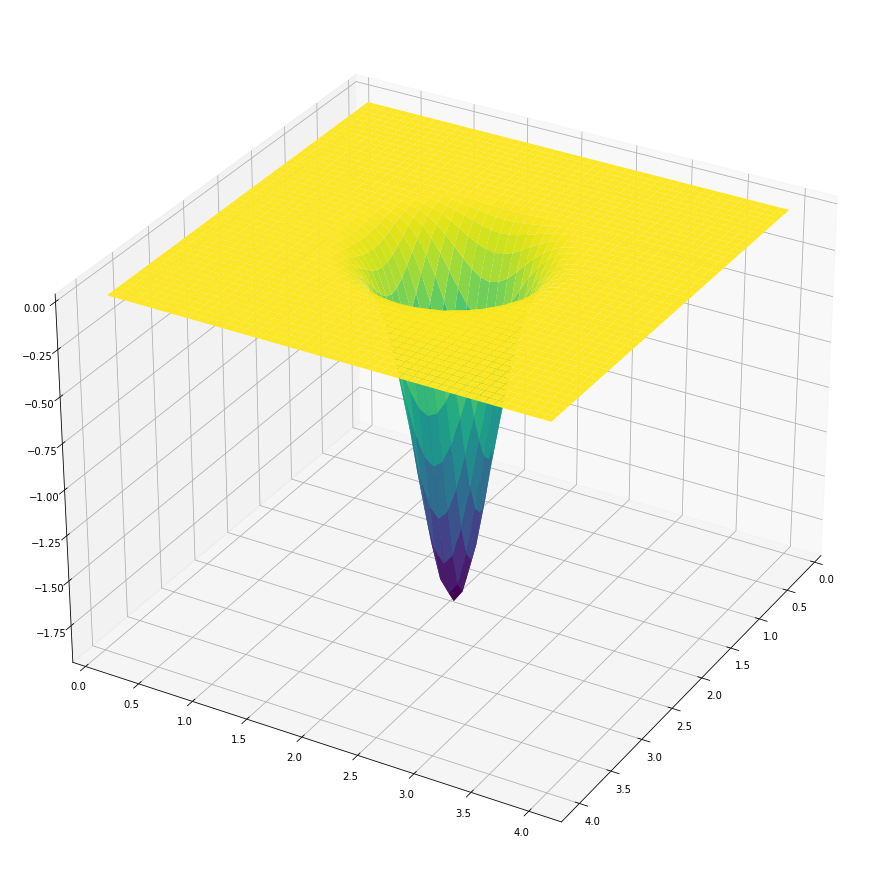

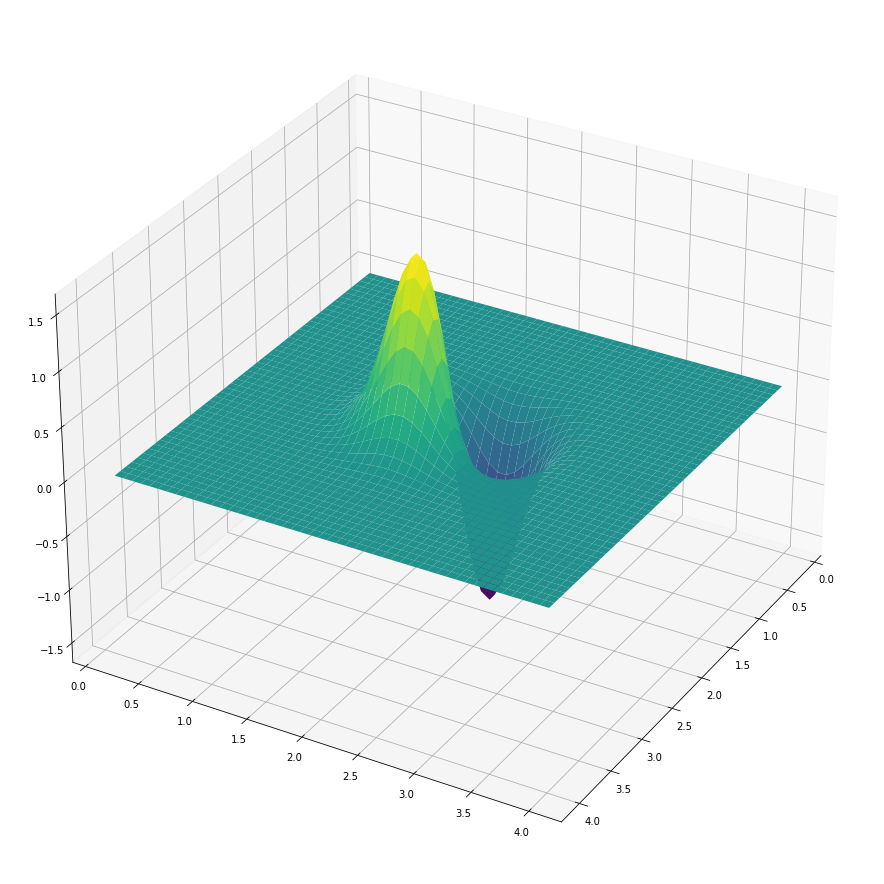

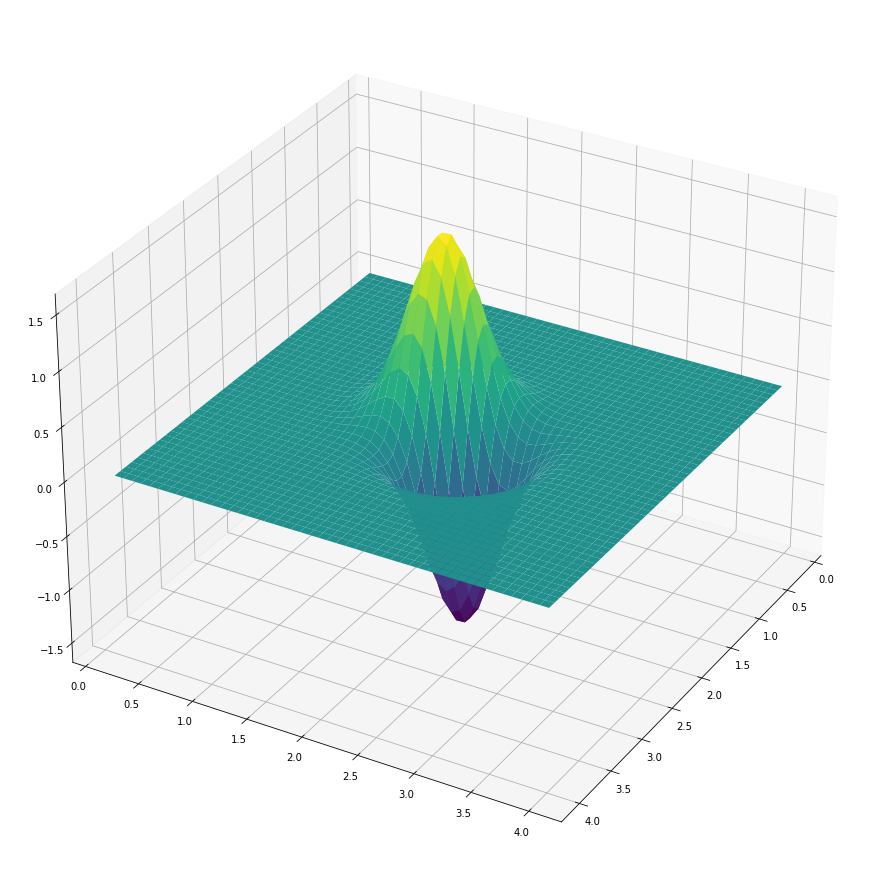

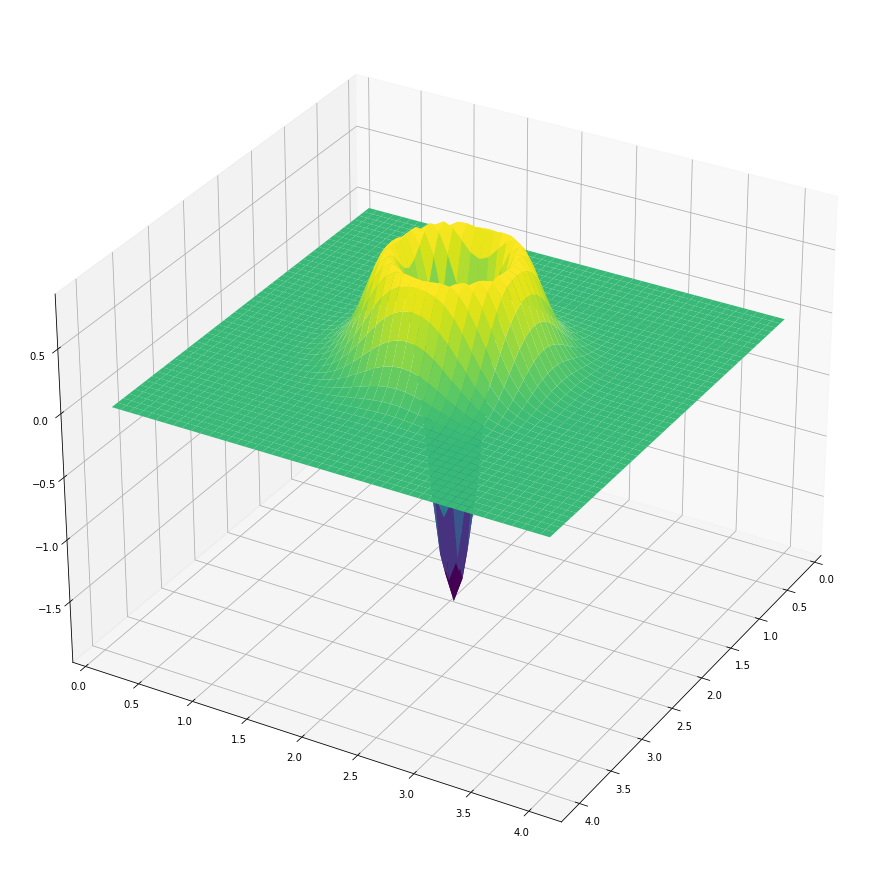

In [182]:
# plot eigenvectors in 3D
fig_2 = []
ax_2 = []

for i in range(4):
    fig_2.append(plot.figure())
    ax_2.append(plot.axes(projection='3d'))

    # set size of plot
    fig_2[i].set_size_inches(16, 16)

    #ax_2[i].contour3D(X, Y, display_vectors[i], 100)
    ax_2[i].plot_surface(X, Y, display_vectors[i], rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')
    ax_2[i].view_init(30, 30)

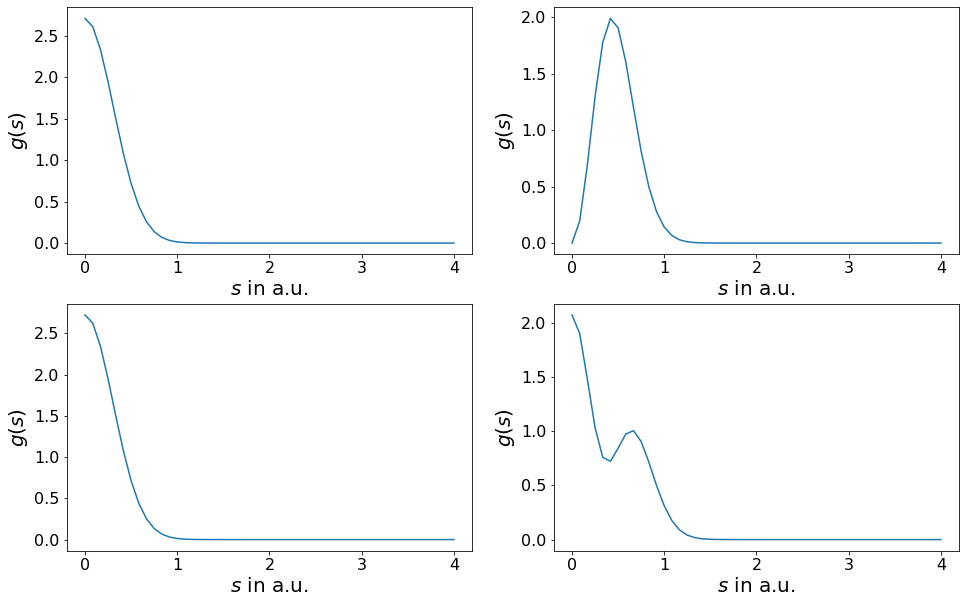

In [183]:
# calculate and plot pair correlation function
correlation_functions = []

for k in range(6):
    for i in range(number_of_data_points):
        correlation_functions.append(np.zeros(number_of_data_points))

        for j in range(number_of_data_points):
            if (j + i) < number_of_data_points:
                correlation_functions[k][i] += display_vectors[k][j, j + i] * display_vectors[k][j, j + i] * step_size
            if (j - i) >= 0:
                correlation_functions[k][i] += display_vectors[k][j, j - i] * display_vectors[k][j, j - i] * step_size
        
x = np.linspace(0, 4, number_of_data_points)
    
fig, _ax = plot.subplots(nrows=2, ncols=2)
ax = _ax.flatten()

# set size of plot
fig.set_size_inches(16, 10)

for i in range(4):
    ax[i].plot(x, correlation_functions[i])
    
    ax[i].set_xlabel('$s$ in a.u.', fontsize=20)
    ax[i].set_ylabel('$g(s)$', fontsize=20)
    ax[i].tick_params(axis='both', which='major', labelsize=16)

plot.show()